In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [2]:
with open('/home/jovyan/work/first_month_views.pkl', 'rb') as f:
    first_month_views = pickle.load(f)
    
with open('/home/jovyan/work/three_months_views.pkl', 'rb') as f:
    three_months_views_df = pickle.load(f)
    
with open('/home/jovyan/work/three_months_views_wr30.pkl', 'rb') as f:
    three_months_views_wr30_df = pickle.load(f)

# content features from ./content_features_creation
with open('/home/jovyan/work/elements_available.pkl', 'rb') as f:
    elements_available = pickle.load(f)

# from ./unique_users_each_month.ipynb
with open('/home/jovyan/work/active_users_months.pkl', 'rb') as f:
    active_users = pickle.load(f)

with open('/home/jovyan/work/el_uid_min_ts.pkl', 'rb') as f:
    el_uid_min_ts = pickle.load(f)

active_users['year_month'] = [pd.Timestamp(f'{y}.{m}').strftime('%Y-%m') for y, m in zip(active_users['year'], active_users['month'])]
active_users.drop(['year', 'month'], axis=1, inplace=True)
active_users['user_count_fraction'] = active_users['user_count'] / 1000000
el_uid_min_ts['min_ts'] = el_uid_min_ts['min_ts'].astype('datetime64[ns]')

In [3]:
!pwd

/home/jovyan/work/cold_start_models


In [4]:
features = ['actor', 'age_access_type', 'country', 'duration', 
            'type', 'name', 'genre', 'director', 'target']

In [5]:
el_uid_min_ts

,element_uid,min_ts
0,03b5e971-19db-4cfe-9421-758965e44fe4,2020-09-20 00:04:17
1,062898a3-7cfa-4f2b-9449-62ab856947fe,2021-07-23 02:50:45
2,07b3c184-a44c-4ada-84fb-4a3804294efb,2020-09-20 08:13:41
3,0a75caf0-9bdc-4a67-b291-31377ec95b81,2022-07-01 04:20:07
4,0e145f6c-b6c7-4483-9ad2-9cbda3c6f010,2020-09-22 12:29:19
...,...,...
12743,e2c89ec3-a004-4c3e-9657-897db7e03eeb,2021-08-03 23:06:56
12744,e3a4a622-a338-48f1-bada-026fc8c34b3a,2021-12-08 08:07:31
12745,eabd5002-7460-453f-bd1d-e517a3ef4044,2022-02-28 20:12:29
12746,f6d2418b-5a02-4b72-b05c-a87290e6cb53,2020-09-20 22:09:25


In [6]:
elements_available.columns

Index(['actor', 'children', 'sale_start_date', 'uid',
       'age_restriction_aliases', 'age_access_type', 'country',
       'subscription_only', 'availability', 'box_office_worldwide',
       'average_rating', 'box_office_russia', 'duration', 'type', 'alias',
       'name', 'release_type', 'release_year', 'budget', 'digital_uid',
       'genre', 'director'],
      dtype='object')

In [7]:
elements_available['release_type'].unique()

array(['RELEASE'], dtype=object)

In [8]:
# start from
print('min_ts in candidates:', el_uid_min_ts['min_ts'].min()),
print('min_ts in views', active_users['year_month'].min())

min_ts in candidates: 2020-09-19 23:59:59
min_ts in views 2020-10


In [9]:
pd.to_datetime([f'2020.10'])[0]

Timestamp('2020-10-01 00:00:00')

In [10]:
print('Number of elements with min_ts in 2020-09:', sum(el_uid_min_ts['min_ts'] < pd.to_datetime([f'2020.10'])[0]))

Number of elements with min_ts in 2020-09: 6895


In [11]:
el_uid_min_ts[el_uid_min_ts['min_ts'] < pd.to_datetime([f'2020.10'])[0]]

,element_uid,min_ts
0,03b5e971-19db-4cfe-9421-758965e44fe4,2020-09-20 00:04:17
2,07b3c184-a44c-4ada-84fb-4a3804294efb,2020-09-20 08:13:41
4,0e145f6c-b6c7-4483-9ad2-9cbda3c6f010,2020-09-22 12:29:19
6,13244750-51d7-4b67-801a-4229077642fa,2020-09-20 00:46:12
8,1459fe0a-bd84-4bea-a8c7-c00933262cd0,2020-09-20 00:22:03
...,...,...
12739,d1abb870-be4e-4004-b844-f9604e7cf673,2020-09-20 05:44:10
12740,d43fad39-794c-4f21-8da0-60a5fcda732b,2020-09-21 01:29:07
12741,daf1ca56-2868-481e-8003-fec7d812db58,2020-09-20 00:26:30
12742,db301c37-1d1c-4532-94ba-27148ee68339,2020-09-20 07:27:22


In [12]:
# number of unique elements
print('Number of unique elements from candidates:', len(el_uid_min_ts['element_uid'].unique()))
print('Number of unique elements from catalogue with unified uids:', len(elements_available['uid']))
print('Number of unique elements from candidates after filtering 3 months from min_ts and wr >= 0.5:', len(three_months_views_df['element_uid'].unique()))
print('Number of unique elements from candidates after filtering 3 months from min_ts and wr >= 0.3:', len(three_months_views_wr30_df['element_uid'].unique()))
print('Number of unique elements from candidates after filtering 1 month and wr >= 0.5:', len(first_month_views['element_uid'].unique()))

Number of unique elements from candidates: 12748
Number of unique elements from catalogue with unified uids: 12748
Number of unique elements from candidates after filtering 3 months from min_ts and wr >= 0.5: 12131
Number of unique elements from candidates after filtering 3 months from min_ts and wr >= 0.3: 12181
Number of unique elements from candidates after filtering 1 month and wr >= 0.5: 5061


In [13]:
# merge content features, views for 3 months wr 0.5 & views for 3 months wr 0.3
el_uid_views = elements_available.merge(three_months_views_df,
                                       left_on='uid',
                                       right_on='element_uid',
                                           how='inner').merge(three_months_views_wr30_df,
                                                               on='element_uid',
                                                               how='inner')

In [14]:
el_uid_views

,actor,children,sale_start_date,uid,age_restriction_aliases,age_access_type,country,subscription_only,availability,box_office_worldwide,...,name,release_type,release_year,budget,digital_uid,genre,director,element_uid,users_number_x,users_number_y
0,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...",NaN,1277323200000,e785baa6-f175-42b4-9e16-4319ac7991d5,[CR_9_13],12,[usa],False,"[DTO, RENT, SUBSCRIPTION]",NaN,...,Звёздный путь 5: Последний рубеж,RELEASE,1989,27800000,2870,"[Sci-Fi, Action, Thriller, Adventure]",[cff3362f-ad91-498d-80b3-ea3ab8ec65cf],e785baa6-f175-42b4-9e16-4319ac7991d5,6,6
1,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...",NaN,1277323200000,4593737e-de9c-40df-97db-fb3cf85a08ef,NaN,16,[usa],False,"[DTO, RENT, SUBSCRIPTION]",NaN,...,Звёздный путь 6: Неоткрытая страна,RELEASE,1991,30000000,2873,"[Sci-Fi, Action, Thriller, Adventure]",[bab6b7f4-4506-458f-9091-d567505674f2],4593737e-de9c-40df-97db-fb3cf85a08ef,11,12
2,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, bcad17e...",NaN,1638479280894,11ba66db-e941-4c3a-8da6-d8900e56f8c7,NaN,18,[usa],False,"[DTO, RENT, SUBSCRIPTION]",NaN,...,В поисках древнего артефакта,RELEASE,2019,NaN,52428009,[Horror],[895f5774-964a-4c5a-ae22-d697d3e3e620],11ba66db-e941-4c3a-8da6-d8900e56f8c7,19,20
3,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...",NaN,1605042957019,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,NaN,18,[usa],True,[SUBSCRIPTION],NaN,...,Прожарка Чарли Шина,RELEASE,2011,NaN,1084933,"[Comedy, Documentary]",[1de22aff-430e-4af9-bf1d-159dbf8e9269],3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,1637,2159
4,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a805fdd...",NaN,1608153790877,cdfa700f-122d-41e5-b8dc-9c6813bab6d2,NaN,18,[usa],True,[SUBSCRIPTION],NaN,...,Прожарка Уильяма Шэтнера,RELEASE,2006,NaN,1191553,[Comedy],[1de22aff-430e-4af9-bf1d-159dbf8e9269],cdfa700f-122d-41e5-b8dc-9c6813bab6d2,322,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12126,[d08bba89-e937-40f3-b2a7-7ea26de4c246],[7ded538c-194e-4807-b161-a69821724721],1661502510710,43bddcc0-db12-428e-9c65-f5606aa4b989,NaN,0,[russia],True,[SUBSCRIPTION],NaN,...,Загадки Русской истории,RELEASE,2011,NaN,368638083,"[Documentary, d7214feb-8c11-4aea-aabb-ac98a8d5...",[384deeb0-ab24-4e3f-9744-1660b2ecaf67],43bddcc0-db12-428e-9c65-f5606aa4b989,74,109
12127,[d08bba89-e937-40f3-b2a7-7ea26de4c246],[1f9803c3-4a07-48cd-92b5-3917454a7fc3],1661980015141,ac0c9152-c070-43a0-bb99-7e72764b7c0a,"[CR_0_4, CR_5_8]",0,[brasil],True,[SUBSCRIPTION],NaN,...,Изобретая игры,RELEASE,2019,NaN,388072866,[287a1485-7a88-4c2f-bc94-ca418b6c47a1],[ecc88cca-7660-4d74-a0af-18ca7069a743],ac0c9152-c070-43a0-bb99-7e72764b7c0a,8,11
12128,[50ed4519-ad24-47b3-b135-947dba796372],[6cff0a01-04a1-434a-9b26-a53811ec6055],1661807225707,ce8d2906-a33f-4140-9ffe-e091990d71a4,"[CR_5_8, CR_9_13]",6,[russia],False,"[SUBSCRIPTION, AVOD]",NaN,...,Большие игры,RELEASE,2022,NaN,376604149,"[ForKids, 1f22ccf1-288a-4e6e-b39a-7502799e7125]",[ad784ddb-a602-4082-bf6f-f83ec5a96edf],ce8d2906-a33f-4140-9ffe-e091990d71a4,1182,1556
12129,"[d658fbcd-8e80-4880-a25c-e7a209998969, b6fe1a3...",[4b5dbaea-2251-4d10-b961-e99568373933],1661980015141,0bfb5a13-50fc-48f3-b51a-a30971024651,"[CR_0_4, CR_0_13, CR_5_8, CR_9_13]",0,[china],True,[SUBSCRIPTION],NaN,...,Природный патруль,RELEASE,2021,NaN,375536499,[287a1485-7a88-4c2f-bc94-ca418b6c47a1],[9d6f5496-2d1b-4f21-a2d8-52b316295c4a],0bfb5a13-50fc-48f3-b51a-a30971024651,193,285


In [15]:
el_uid_views['uid']

0        e785baa6-f175-42b4-9e16-4319ac7991d5
1        4593737e-de9c-40df-97db-fb3cf85a08ef
2        11ba66db-e941-4c3a-8da6-d8900e56f8c7
3        3f30a2ef-53b7-40e3-954f-1bdfc38a6d17
4        cdfa700f-122d-41e5-b8dc-9c6813bab6d2
                         ...                 
12126    43bddcc0-db12-428e-9c65-f5606aa4b989
12127    ac0c9152-c070-43a0-bb99-7e72764b7c0a
12128    ce8d2906-a33f-4140-9ffe-e091990d71a4
12129    0bfb5a13-50fc-48f3-b51a-a30971024651
12130    6dd86e60-5d6d-475d-9b46-e989ac7a30b6
Name: uid, Length: 12131, dtype: object

In [16]:
el_uid_views.columns

Index(['actor', 'children', 'sale_start_date', 'uid',
       'age_restriction_aliases', 'age_access_type', 'country',
       'subscription_only', 'availability', 'box_office_worldwide',
       'average_rating', 'box_office_russia', 'duration', 'type', 'alias',
       'name', 'release_type', 'release_year', 'budget', 'digital_uid',
       'genre', 'director', 'element_uid', 'users_number_x', 'users_number_y'],
      dtype='object')

In [17]:
# select relevant features
feature_columns = ['actor', 'age_access_type', 'country',
                   'average_rating', 'duration', 'type',
                   'name', 'release_year','genre', 
                   'director', 'element_uid', 'availability',
                   'users_number_x', 'users_number_y', 'subscription_only',
                   'uid']

dataset = el_uid_views[feature_columns]

In [18]:
dataset

,actor,age_access_type,country,average_rating,duration,type,name,release_year,genre,director,element_uid,availability,users_number_x,users_number_y,subscription_only,uid
0,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...",12,[usa],6.21,6420000,MOVIE,Звёздный путь 5: Последний рубеж,1989,"[Sci-Fi, Action, Thriller, Adventure]",[cff3362f-ad91-498d-80b3-ea3ab8ec65cf],e785baa6-f175-42b4-9e16-4319ac7991d5,"[DTO, RENT, SUBSCRIPTION]",6,6,False,e785baa6-f175-42b4-9e16-4319ac7991d5
1,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...",16,[usa],7.2,6780000,MOVIE,Звёздный путь 6: Неоткрытая страна,1991,"[Sci-Fi, Action, Thriller, Adventure]",[bab6b7f4-4506-458f-9091-d567505674f2],4593737e-de9c-40df-97db-fb3cf85a08ef,"[DTO, RENT, SUBSCRIPTION]",11,12,False,4593737e-de9c-40df-97db-fb3cf85a08ef
2,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, bcad17e...",18,[usa],4.0,6000000,MOVIE,В поисках древнего артефакта,2019,[Horror],[895f5774-964a-4c5a-ae22-d697d3e3e620],11ba66db-e941-4c3a-8da6-d8900e56f8c7,"[DTO, RENT, SUBSCRIPTION]",19,20,False,11ba66db-e941-4c3a-8da6-d8900e56f8c7
3,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...",18,[usa],6.99,3780000,MOVIE,Прожарка Чарли Шина,2011,"[Comedy, Documentary]",[1de22aff-430e-4af9-bf1d-159dbf8e9269],3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,[SUBSCRIPTION],1637,2159,True,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17
4,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a805fdd...",18,[usa],6.0,3780000,MOVIE,Прожарка Уильяма Шэтнера,2006,[Comedy],[1de22aff-430e-4af9-bf1d-159dbf8e9269],cdfa700f-122d-41e5-b8dc-9c6813bab6d2,[SUBSCRIPTION],322,416,True,cdfa700f-122d-41e5-b8dc-9c6813bab6d2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12126,[d08bba89-e937-40f3-b2a7-7ea26de4c246],0,[russia],NaN,25140000,SERIAL,Загадки Русской истории,2011,"[Documentary, d7214feb-8c11-4aea-aabb-ac98a8d5...",[384deeb0-ab24-4e3f-9744-1660b2ecaf67],43bddcc0-db12-428e-9c65-f5606aa4b989,[SUBSCRIPTION],74,109,True,43bddcc0-db12-428e-9c65-f5606aa4b989
12127,[d08bba89-e937-40f3-b2a7-7ea26de4c246],0,[brasil],NaN,5400000,SERIAL,Изобретая игры,2019,[287a1485-7a88-4c2f-bc94-ca418b6c47a1],[ecc88cca-7660-4d74-a0af-18ca7069a743],ac0c9152-c070-43a0-bb99-7e72764b7c0a,[SUBSCRIPTION],8,11,True,ac0c9152-c070-43a0-bb99-7e72764b7c0a
12128,[50ed4519-ad24-47b3-b135-947dba796372],6,[russia],NaN,3600000,SERIAL,Большие игры,2022,"[ForKids, 1f22ccf1-288a-4e6e-b39a-7502799e7125]",[ad784ddb-a602-4082-bf6f-f83ec5a96edf],ce8d2906-a33f-4140-9ffe-e091990d71a4,"[SUBSCRIPTION, AVOD]",1182,1556,False,ce8d2906-a33f-4140-9ffe-e091990d71a4
12129,"[d658fbcd-8e80-4880-a25c-e7a209998969, b6fe1a3...",0,[china],NaN,40560000,SERIAL,Природный патруль,2021,[287a1485-7a88-4c2f-bc94-ca418b6c47a1],[9d6f5496-2d1b-4f21-a2d8-52b316295c4a],0bfb5a13-50fc-48f3-b51a-a30971024651,[SUBSCRIPTION],193,285,True,0bfb5a13-50fc-48f3-b51a-a30971024651


In [19]:
dataset.isnull().sum()

actor                  0
age_access_type        0
country                0
average_rating       659
duration               0
type                   0
name                   0
release_year           0
genre                  0
director               2
element_uid            0
availability         159
users_number_x         0
users_number_y         0
subscription_only      0
uid                    0
dtype: int64

In [20]:
dataset.shape

(12131, 16)

In [21]:
# finally define number of users for series and movies
dataset['user_count_3months'] = [dataset.loc[i, 'users_number_x'] if 'MOVIE' in t else dataset.loc[i, 'users_number_y'] 
                                                                     for i, t in zip(dataset.index, dataset['type'])]

In [22]:
# add timestamps 
dataset = dataset.merge(el_uid_min_ts,
                        on='element_uid')

In [23]:
dataset.shape

(12131, 18)

In [24]:
# modify active_users
active_users = active_users.sort_values(['year_month'])
dataset['year_month'] = dataset['min_ts'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m'))

In [25]:
# add active_users for 3 months
total_user_count = []
total_user_count_2 = []

views_start = pd.Timestamp('2020-10').strftime('%Y-%m')
for y_m in   dataset['year_month']:
    if y_m < views_start:
        begin = active_users[active_users['year_month'] == views_start].index[0]
    else:
        begin = active_users[active_users['year_month'] == y_m].index[0]
    
    total_user_count.append(sum(active_users[begin: begin+3]['user_count']))
    total_user_count_2.append(sum(active_users[begin: begin+3]['user_count_fraction']))

In [26]:
dataset['total_user_count_3months'] = total_user_count
dataset['total_user_count_3months_frac'] = total_user_count_2

In [27]:
dataset

,actor,age_access_type,country,average_rating,duration,type,name,release_year,genre,director,...,availability,users_number_x,users_number_y,subscription_only,uid,user_count_3months,min_ts,year_month,total_user_count_3months,total_user_count_3months_frac
0,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...",12,[usa],6.21,6420000,MOVIE,Звёздный путь 5: Последний рубеж,1989,"[Sci-Fi, Action, Thriller, Adventure]",[cff3362f-ad91-498d-80b3-ea3ab8ec65cf],...,"[DTO, RENT, SUBSCRIPTION]",6,6,False,e785baa6-f175-42b4-9e16-4319ac7991d5,6,2020-09-22 17:12:10,2020-09,7051642,7.051642
1,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...",16,[usa],7.2,6780000,MOVIE,Звёздный путь 6: Неоткрытая страна,1991,"[Sci-Fi, Action, Thriller, Adventure]",[bab6b7f4-4506-458f-9091-d567505674f2],...,"[DTO, RENT, SUBSCRIPTION]",11,12,False,4593737e-de9c-40df-97db-fb3cf85a08ef,11,2020-09-22 17:12:21,2020-09,7051642,7.051642
2,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, bcad17e...",18,[usa],4.0,6000000,MOVIE,В поисках древнего артефакта,2019,[Horror],[895f5774-964a-4c5a-ae22-d697d3e3e620],...,"[DTO, RENT, SUBSCRIPTION]",19,20,False,11ba66db-e941-4c3a-8da6-d8900e56f8c7,19,2021-12-03 01:07:47,2021-12,5310154,5.310154
3,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...",18,[usa],6.99,3780000,MOVIE,Прожарка Чарли Шина,2011,"[Comedy, Documentary]",[1de22aff-430e-4af9-bf1d-159dbf8e9269],...,[SUBSCRIPTION],1637,2159,True,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,1637,2020-11-10 00:37:34,2020-11,4618077,4.618077
4,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a805fdd...",18,[usa],6.0,3780000,MOVIE,Прожарка Уильяма Шэтнера,2006,[Comedy],[1de22aff-430e-4af9-bf1d-159dbf8e9269],...,[SUBSCRIPTION],322,416,True,cdfa700f-122d-41e5-b8dc-9c6813bab6d2,322,2020-12-17 01:36:56,2020-12,5035806,5.035806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12126,[d08bba89-e937-40f3-b2a7-7ea26de4c246],0,[russia],NaN,25140000,SERIAL,Загадки Русской истории,2011,"[Documentary, d7214feb-8c11-4aea-aabb-ac98a8d5...",[384deeb0-ab24-4e3f-9744-1660b2ecaf67],...,[SUBSCRIPTION],74,109,True,43bddcc0-db12-428e-9c65-f5606aa4b989,109,2022-08-26 13:43:34,2022-08,1668899,1.668899
12127,[d08bba89-e937-40f3-b2a7-7ea26de4c246],0,[brasil],NaN,5400000,SERIAL,Изобретая игры,2019,[287a1485-7a88-4c2f-bc94-ca418b6c47a1],[ecc88cca-7660-4d74-a0af-18ca7069a743],...,[SUBSCRIPTION],8,11,True,ac0c9152-c070-43a0-bb99-7e72764b7c0a,11,2022-09-01 11:50:27,2022-09,5756975,5.756975
12128,[50ed4519-ad24-47b3-b135-947dba796372],6,[russia],NaN,3600000,SERIAL,Большие игры,2022,"[ForKids, 1f22ccf1-288a-4e6e-b39a-7502799e7125]",[ad784ddb-a602-4082-bf6f-f83ec5a96edf],...,"[SUBSCRIPTION, AVOD]",1182,1556,False,ce8d2906-a33f-4140-9ffe-e091990d71a4,1556,2022-08-24 11:32:52,2022-08,1668899,1.668899
12129,"[d658fbcd-8e80-4880-a25c-e7a209998969, b6fe1a3...",0,[china],NaN,40560000,SERIAL,Природный патруль,2021,[287a1485-7a88-4c2f-bc94-ca418b6c47a1],[9d6f5496-2d1b-4f21-a2d8-52b316295c4a],...,[SUBSCRIPTION],193,285,True,0bfb5a13-50fc-48f3-b51a-a30971024651,285,2022-08-23 21:38:02,2022-08,1668899,1.668899


In [28]:
dataset['target'] = dataset['user_count_3months'] / dataset['total_user_count_3months']
dataset['target_2'] = dataset['user_count_3months'] / dataset['total_user_count_3months_frac']

<AxesSubplot: >

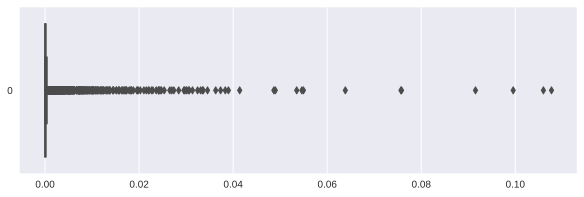

In [29]:
plt.figure(figsize=(10, 3))
sns.boxplot(dataset['target'], orient='h')

<AxesSubplot: >

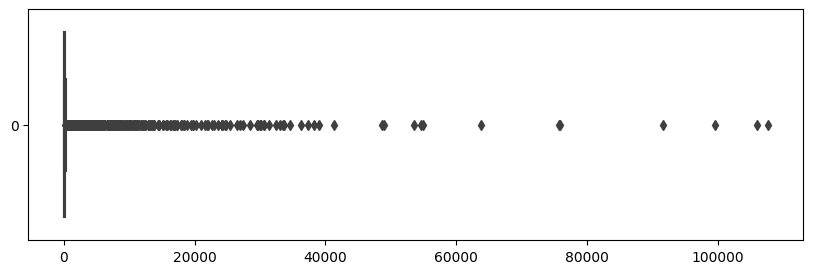

In [34]:
plt.figure(figsize=(10, 3))
sns.boxplot(dataset['target_2'], orient='h')

In [40]:
dataset.columns

Index(['actor', 'age_access_type', 'country', 'average_rating', 'duration',
       'type', 'name', 'release_year', 'genre', 'director', 'element_uid',
       'availability', 'users_number_x', 'users_number_y', 'subscription_only',
       'uid', 'user_count_3months', 'min_ts', 'year_month',
       'total_user_count_3months', 'total_user_count_3months_frac', 'target',
       'target_2'],
      dtype='object')

In [41]:
# top watched
dataset[dataset['target'] > 0.05]

,actor,age_access_type,country,average_rating,duration,type,name,release_year,genre,director,...,users_number_y,subscription_only,uid,user_count_3months,min_ts,year_month,total_user_count_3months,total_user_count_3months_frac,target,target_2
4942,"[9dd1d3ec-a988-4e3e-8d9c-26a99d0aa34d, 78338a6...",18,[usa],5.8,5700000,MOVIE,Пропавшая,2022,"[Action, Thriller]",[a87d99fb-0872-43d1-a5ae-d6630d7441d6],...,237191,True,ecb158cc-3f87-4c74-8410-95396c55eb91,226186,2022-07-14 16:47:14,2022-07,4141823,4.141823,0.054610,54610.252539
6936,"[8230f5be-549b-44e8-929c-599c20082fbd, fe827f5...",12,[russia],6.3,9300000,MOVIE,Непослушник,2021,[Comedy],[a2e96430-845c-4434-a438-0eb4021bd6cc],...,431909,True,5917c7e2-b58e-4d82-b0b7-6c9fb0af6769,404322,2022-03-04 17:37:23,2022-03,4417100,4.417100,0.091536,91535.622920
7250,"[70c19403-0c82-4b06-a74e-4507a696b3d7, b7b9559...",16,[russia],6.75,6480000,MOVIE,Глубже!,2020,[Comedy],[ff29b0e8-9a81-4248-983f-919b31adca5c],...,391046,False,72bfbc25-6cac-495e-9f43-c7afa4f2338c,349520,2020-11-09 15:34:02,2020-11,4618077,4.618077,0.075685,75685.182382
7288,"[27842202-a16a-40cf-96b3-fe0bbc4aae1b, f8a60c0...",18,[russia],6.08,6480000,MOVIE,Непосредственно Каха,2020,[Comedy],[49c011d6-76e0-4d4a-b90b-633dacf70120],...,296696,True,536a6702-3fbb-4f10-8308-bcafe09f560c,276701,2020-12-09 12:34:46,2020-12,5035806,5.035806,0.054947,54946.715580
7587,"[b679c442-ee05-4199-b7cc-143825a89754, a8e7215...",6,[russia],5.87,5820000,MOVIE,Стрельцов,2020,"[Melodrama, Sport]",[acbf95ae-07a2-4612-b4b2-8c056ec1c40d],...,391492,False,c9fbab47-20d8-496e-a29c-475c10330d9d,377374,2020-10-07 14:48:36,2020-10,7051642,7.051642,0.053516,53515.762712
11760,"[7dfe458c-a376-4c6d-bdd3-9c67ac5277a7, 0043add...",6,[russia],6.9,11640000,SERIAL,Манюня,2021,"[Comedy, Adventure]",[4f6566db-6c80-4694-b244-c954d5363fee],...,339083,True,9b202b16-55bf-418a-b01d-9f0329b18790,339083,2021-12-02 17:51:27,2021-12,5310154,5.310154,0.063856,63855.586862
11811,"[347078a4-b872-46e0-b228-be4b07c357f6, ddafb49...",12,[russia],6.6,15840000,SERIAL,Предпоследняя инстанция,2022,"[Comedy, 9fa28b61-a257-4a3e-945b-a9ef76a146d6]",[344a8ac8-7e62-4108-85bc-e30bf9243680],...,571894,True,36d9d568-75d0-414d-9765-25bf72c6362f,571894,2021-12-21 21:55:55,2021-12,5310154,5.310154,0.107698,107698.194817
11900,"[873ef75b-33c2-448f-a2fe-9b2d437d2ce4, 8227840...",18,[russia],7.6,26460000,SERIAL,Зона комфорта,2020,[Comedy],[0ecf7893-a490-4689-b3d5-4a3873c02a04],...,445768,False,c8bcf0d5-1a8e-49a9-b081-8750c1a86d05,445768,2022-02-22 00:31:24,2022-02,4477567,4.477567,0.099556,99555.852542
11967,"[63609326-00d3-45f5-9d6c-d8245026d740, 2de47f4...",18,[russia],7.7,30060000,SERIAL,Оффлайн,2022,"[Thriller, Drama, Detective]",[b4ed432a-edfc-4853-89ec-a0f4bd22c88f],...,415067,True,49a3d528-44c0-408e-b6fc-a1507ce7641a,415067,2022-04-13 20:43:13,2022-04,5475014,5.475014,0.075811,75811.130346
12108,"[9bf37b24-f123-4552-9930-7194e407d7de, 4f9d6fc...",18,[russia],6.2,6720000,SERIAL,"Что делать женщине, если у неё два любовника, ...",2022,[Comedy],[e4cead3a-f966-4393-8910-74b753456b2f],...,176866,True,955c3acd-c6d0-4ae4-89e4-3e0b067071e9,176866,2022-08-24 10:24:56,2022-08,1668899,1.668899,0.105978,105977.653531


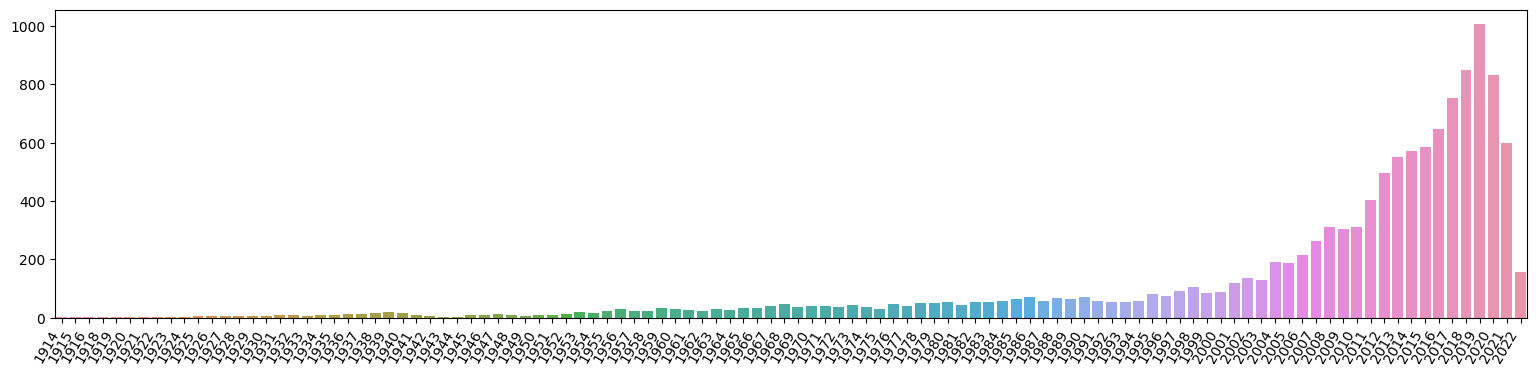

In [48]:
bar_info = dataset['release_year'].value_counts()
bar_info = [(i, v) for i, v in zip(bar_info.index, bar_info.values)]
bar_info = sorted(bar_info, key=lambda x: x[0])

plt.figure(figsize=(19, 4))
chart = sns.barplot(y=[v[1] for v in bar_info], x=[v[0] for v in bar_info])
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

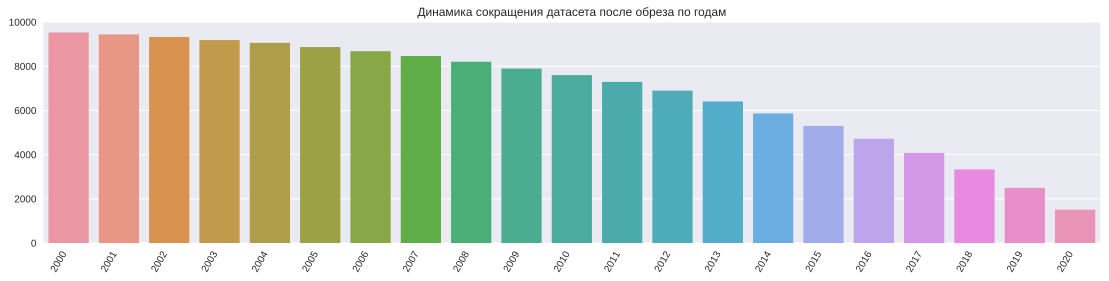

In [73]:
bar_info = [(year, sum((dataset['min_ts'] < pd.to_datetime([f'2022.08'])[0]) & (dataset['release_year'] >= year))) for year in range(2000, 2021)]

plt.figure(figsize=(19, 4))
chart = sns.barplot(y=[v[1] for v in bar_info], x=[v[0] for v in bar_info])
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.title('Динамика сокращения датасета после обреза по годам')
plt.savefig('dataset_decreasing_by_years')
plt.show()

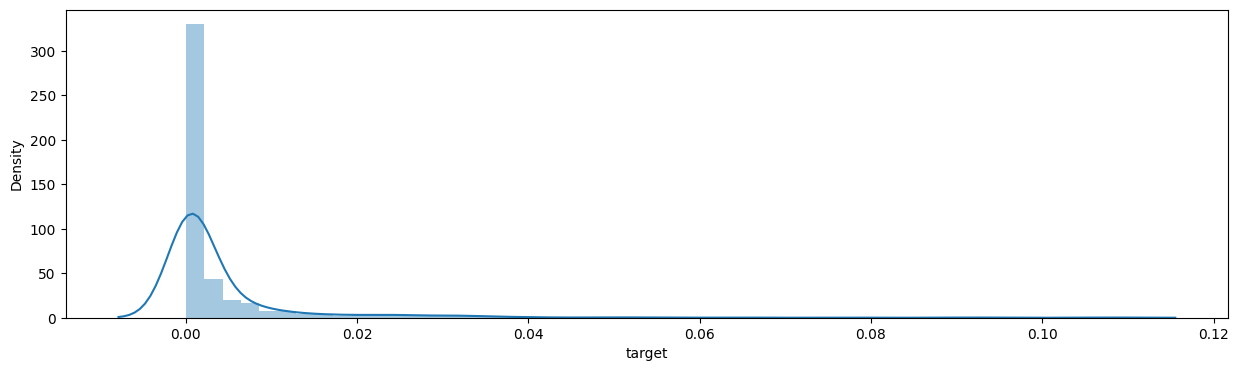

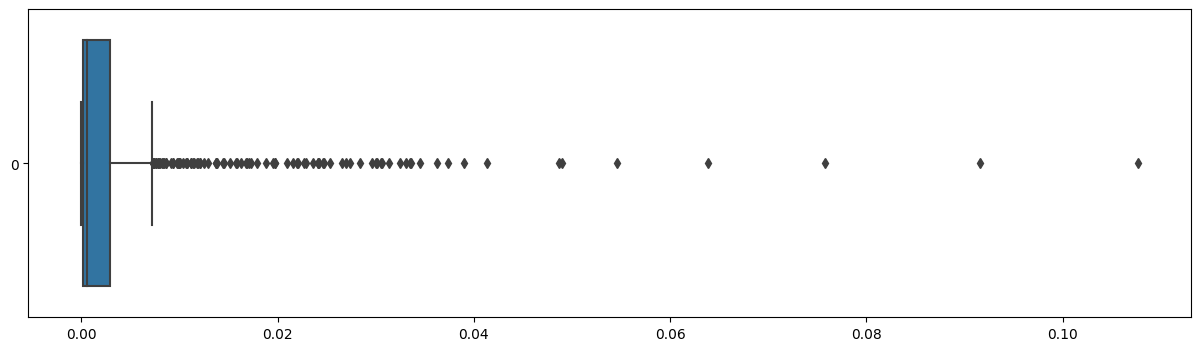

In [54]:
plt.figure(figsize=(15, 4))
sns.distplot(dataset_final['target'])
plt.show()

plt.figure(figsize=(15, 4))
sns.boxplot(dataset_final['target'], orient='h')
plt.show()

In [44]:
final_features = ['actor', 'age_access_type', 'country', 'duration', 'type', 
                  'name', 'genre', 'director', 'target','uid']

Index(['actor', 'age_access_type', 'country', 'average_rating', 'duration',
       'availability', 'type', 'name', 'release_year', 'genre', 'director',
       'target', 'subscription_only', 'uid'],
      dtype='object')